# AOV(Average Order Value) 평균 구매 가치

- 전체 주문 금액 분석
- 주문 건수 분석
- 평균주문금액 계산
- 고객 세그먼트별 aov 분석
- 제품 카테고리별 aov 분석
- 시간별 aov 분석

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings

plt.rc("font", family = "AppleGothic")
sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='white')

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [4]:
customers=pd.read_csv('data/customers.csv')
locations=pd.read_csv('data/locations.csv')
order_items=pd.read_csv('data/order_items.csv')
orders=pd.read_csv('data/orders.csv')
payments=pd.read_csv('data/payments.csv')
products=pd.read_csv('data/products.csv')
reviews=pd.read_csv('data/reviews.csv')
sellers=pd.read_csv('data/sellers.csv')


In [4]:
#데이터 요약

def data_summary(df):
    df_copy=pd.DataFrame(index=df.columns)
    df_copy['count']=df.count()
    df_copy['dtype']=df.dtypes
    df_copy['nunique']=df.nunique()
    df_copy['%nunique']=(df_copy['nunique']/len(df))*100
    df_copy['%null']=(df.isnull().sum()/len(df))*100

    df_copy['min']=[df[col].min() if df[col].dtype!='object' else None for col in df.columns]
    df_copy['max']=[df[col].max() if df[col].dtype!='object' else None for col in df.columns]

    df_copy.reset_index(inplace=True)
    df_copy=df_copy.rename(columns={"index":"Column Name"})
    df_copy=df_copy.round(3)
    
    return df_copy



In [23]:
display(data_summary(orders))
display(data_summary(order_items))
display(data_summary(payments))
display(data_summary(products))

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,87955,object,87955,100.000,0.0,None,None
1,Customer_id,87955,object,87955,100.000,0.0,None,None
2,Order_status,87955,object,2,0.002,0.0,None,None
3,Order_purchase_timestamp,87955,object,87479,99.459,0.0,None,None
4,Order_delivered_carrier_date,87955,object,75514,85.855,0.0,None,None
5,Order_delivered_customer_date,87955,object,87197,99.138,0.0,None,None
6,Order_estimated_delivery_date,87955,object,417,0.474,0.0,None,None


,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,100557,object,87954,87.467,0.0,NaN,NaN
1,Order_item_id,100557,int64,21,0.021,0.0,1.00,21.00
2,Product_id,100557,object,29430,29.267,0.0,NaN,NaN
3,Seller_id,100557,object,2761,2.746,0.0,NaN,NaN
4,Price,100557,float64,5433,5.403,0.0,0.85,6735.00
5,Freight_value,100557,float64,6566,6.530,0.0,0.00,409.68


,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,91971,object,87954,95.632,0.0,NaN,NaN
1,Payment_sequential,91971,int64,26,0.028,0.0,1.0,26.00
2,Payment_type,91971,object,4,0.004,0.0,NaN,NaN
3,Payment_installments,91971,int64,24,0.026,0.0,0.0,24.00
4,Payment_value,91971,float64,27061,29.423,0.0,0.0,13664.08


,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Product_id,29471,object,29471,100.000,0.0,None,None
1,Product_category_name,29471,object,72,0.244,0.0,None,None
2,Product_weight_g,29471,object,2092,7.099,0.0,None,None
3,Product_length_cm,29471,object,100,0.339,0.0,None,None
4,Product_height_cm,29471,object,103,0.349,0.0,None,None
5,Product_width_cm,29471,object,95,0.322,0.0,None,None


## 평균구매가치를 2로 높이자!

### 주문당 평균구매가치금액, 프로덕트 수, 제품 구매 수

In [ ]:
#주문당 주문 물품 총 개수
count_per_order=order_items.groupby('Order_id')['Order_item_id'].count().reset_index()
#주문당 주문 금액
payment_per_order=payments.groupby('Order_id')['Payment_value'].sum().reset_index()
#주문당 각기다른 제품 수 
product_per_order=order_items.groupby('Order_id')['Product_id'].nunique().reset_index()

In [65]:
#위의 세개 데이터 합치기
df=pd.merge(count_per_order,payment_per_order,on='Order_id')
df=pd.merge(df,product_per_order,on='Order_id')

#컬럼명 수정
df.rename(columns={'Order_item_id':"items","Payment_value":"payment_price","Product_id":"unique_product"},inplace=True)
df.to_csv('Order_items_payment_unique_product.csv',index=False)

In [66]:
df.describe()

,items,payment_price,unique_product
count,87954.000000,87954.000000,87954.000000
mean,1.143291,159.621620,1.038020
std,0.541073,217.997891,0.222925
min,1.000000,10.070000,1.000000
25%,1.000000,61.790000,1.000000
50%,1.000000,105.280000,1.000000
75%,1.000000,176.105000,1.000000
max,21.000000,13664.080000,7.000000


- 고객 평균 구매 개수 : 1.14 / 중앙값 : 1
- 고객 평균 구매액 : 159.6 / 중앙값 : 105
- 고객 평균 제품 개수 : 1.03 / 중앙값 : 1

### 년도별, 분기별 평균 구매액, 구매수, 제품수

#### 분석을 위한 전처리

In [57]:
df=pd.read_csv('data/Order_items_payment_unique_product.csv')
order=pd.merge(df,orders,on='Order_id')
order=order[order['Order_status']=='delivered'].reset_index()
order.drop(['Order_delivered_carrier_date','Order_status'],axis=1,inplace=True)

In [58]:
#구매시간
#datetime 처리 후 년,월,시,요일 분리
order['Order_purchase_timestamp']=pd.to_datetime(order['Order_purchase_timestamp'])

#년
order['year']=order['Order_purchase_timestamp'].dt.year
order['month']=order['Order_purchase_timestamp'].dt.month
order['hour']=order['Order_purchase_timestamp'].dt.hour
order['weekday']=order['Order_purchase_timestamp'].dt.weekday

#요일 라벨링
order['weekday']=order['weekday'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})

#요일순서 정렬해주기
order['weekday'] = pd.Categorical(order['weekday'], categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True)

In [59]:
#실제배송날짜
#datetime 처리 후 년,월,시,요일 분리
order['Order_delivered_customer_date']=pd.to_datetime(order['Order_delivered_customer_date'])

#년
order['year_de']=order['Order_delivered_customer_date'].dt.year
order['month_de']=order['Order_delivered_customer_date'].dt.month
order['hour_de']=order['Order_delivered_customer_date'].dt.hour
order['weekday_de']=order['Order_delivered_customer_date'].dt.weekday

#요일 라벨링
order['weekday_de']=order['weekday_de'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})

#요일순서 정렬해주기
order['weekday_de'] = pd.Categorical(order['weekday_de'], categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True)

In [60]:
#기대배송날짜 datetime
order['Order_estimated_delivery_date']=pd.to_datetime(order['Order_estimated_delivery_date'])

In [61]:
#실제 배송날짜와 기대 배송날짜
#실제배송날짜-기대배송날짜
order['differ_deliver']=(order['Order_delivered_customer_date']-order['Order_estimated_delivery_date']).dt.days
order['differ']=order['differ_deliver'].apply(lambda x: 'fast' if x<0 else ('on time' if x==0 else 'late'))

In [62]:
order.to_csv('data/order.csv',index=False)

In [63]:
order.head()

,index,Order_id,items,payment_price,unique_product,Customer_id,Order_purchase_timestamp,Order_delivered_customer_date,Order_estimated_delivery_date,year,month,hour,weekday,year_de,month_de,hour_de,weekday_de,differ_deliver,differ
0,0,ORDER_00000,1,38.71,1,CUSTOMER_62232,2018-10-02 10:56:33,2018-10-10 21:25:13,2018-10-18,2018,10,10,화,2018,10,21,수,-8,fast
1,1,ORDER_00001,1,72.20,1,CUSTOMER_54059,2018-11-18 19:28:06,2018-12-02 00:28:42,2018-12-15,2018,11,19,일,2018,12,0,일,-13,fast
2,2,ORDER_00002,1,28.62,1,CUSTOMER_59535,2019-02-13 21:18:39,2019-02-16 18:17:02,2019-02-26,2019,2,21,수,2019,2,18,토,-10,fast
3,3,ORDER_00003,1,175.26,1,CUSTOMER_60516,2018-07-09 21:57:05,2018-07-26 10:57:55,2018-08-01,2018,7,21,월,2018,7,10,목,-6,fast
4,4,ORDER_00004,1,75.16,1,CUSTOMER_76957,2018-05-16 13:10:30,2018-05-26 12:55:51,2018-06-07,2018,5,13,수,2018,5,12,토,-12,fast


In [64]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87948 entries, 0 to 87947
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          87948 non-null  int64         
 1   Order_id                       87948 non-null  object        
 2   items                          87948 non-null  int64         
 3   payment_price                  87948 non-null  float64       
 4   unique_product                 87948 non-null  int64         
 5   Customer_id                    87948 non-null  object        
 6   Order_purchase_timestamp       87948 non-null  datetime64[ns]
 7   Order_delivered_customer_date  87948 non-null  datetime64[ns]
 8   Order_estimated_delivery_date  87948 non-null  datetime64[ns]
 9   year                           87948 non-null  int32         
 10  month                          87948 non-null  int32         
 11  hour           

Text(0.5, 1.0, 'unique_product')

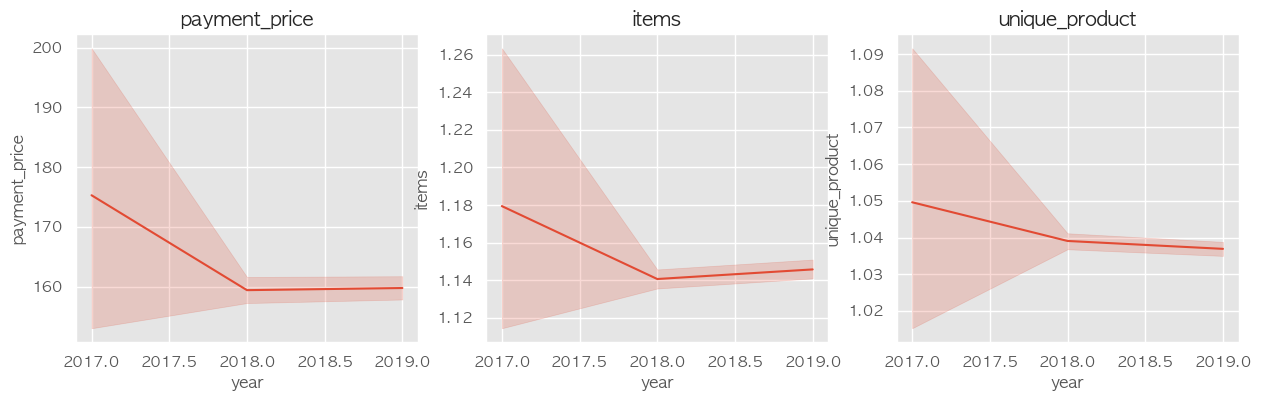

In [65]:
#년도별 추이
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.lineplot(data=order,x='year',y='payment_price',ax=axes[0])
axes[0].set_title("payment_price")

sns.lineplot(data=order,x='year',y='items',ax=axes[1])
axes[1].set_title("items")

sns.lineplot(data=order,x='year',y='unique_product',ax=axes[2])
axes[2].set_title("unique_product")

Text(0.5, 1.0, 'unique_product')

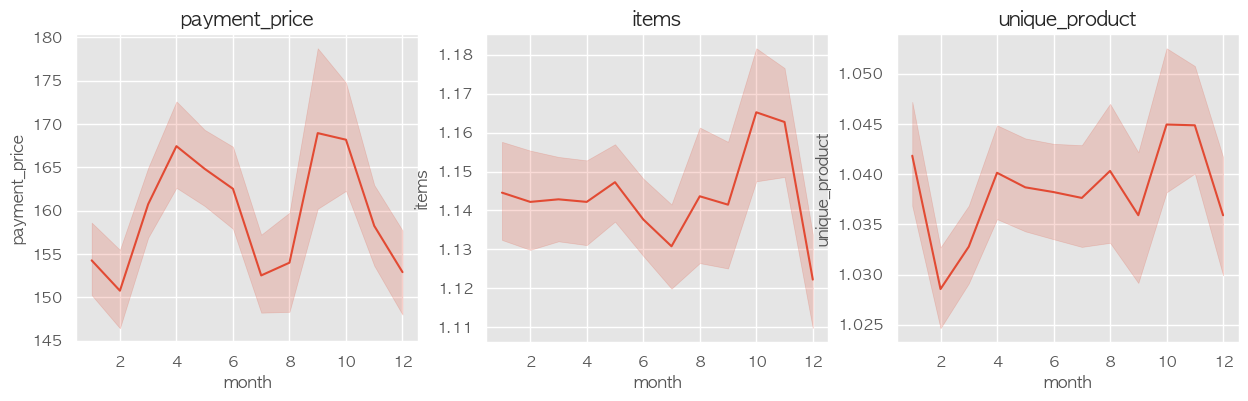

In [31]:
#월별 추이
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.lineplot(data=order,x='month',y='payment_price',ax=axes[0])
axes[0].set_title("payment_price")

sns.lineplot(data=order,x='month',y='items',ax=axes[1])
axes[1].set_title("items")

sns.lineplot(data=order,x='month',y='unique_product',ax=axes[2])
axes[2].set_title("unique_product")

Text(0.5, 1.0, 'unique_product')

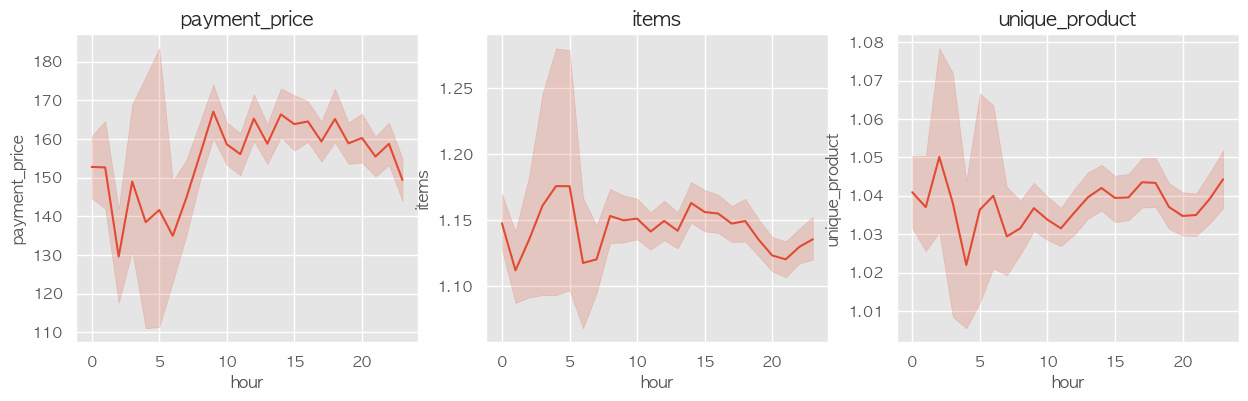

In [32]:
#시간별 추이
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.lineplot(data=order,x='hour',y='payment_price',ax=axes[0])
axes[0].set_title("payment_price")

sns.lineplot(data=order,x='hour',y='items',ax=axes[1])
axes[1].set_title("items")

sns.lineplot(data=order,x='hour',y='unique_product',ax=axes[2])
axes[2].set_title("unique_product")

Text(0.5, 1.0, 'unique_product')

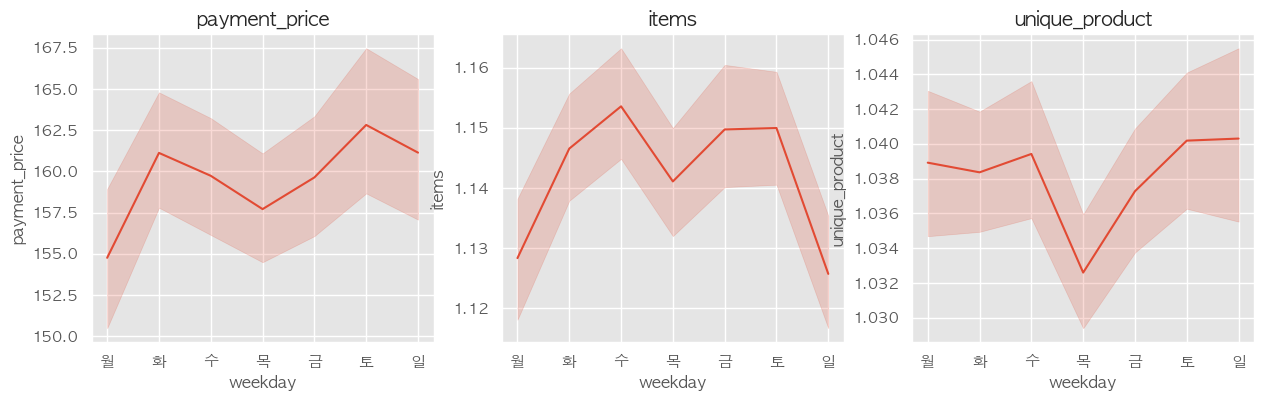

In [43]:
#요일별 추이

fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.lineplot(data=order,x='weekday',y='payment_price',ax=axes[0])
axes[0].set_title("payment_price")

sns.lineplot(data=order,x='weekday',y='items',ax=axes[1])
axes[1].set_title("items")

sns.lineplot(data=order,x='weekday',y='unique_product',ax=axes[2])
axes[2].set_title("unique_product")

### 제품을 한개 이상 사는 사람과 아닌 사람의 비율

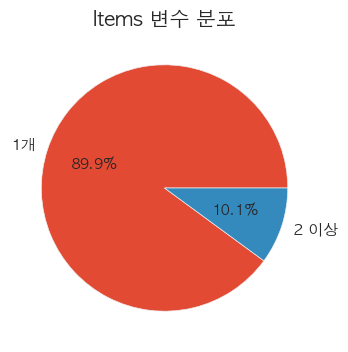

In [66]:
# 'items' 변수가 1 이상인 경우와 그렇지 않은 경우의 개수 계산
count_dict = order['items'].apply(lambda x: '2 이상' if x > 1 else '1개').value_counts()

# 파이 차트 그리기
plt.figure(figsize=(4, 4))
plt.pie(count_dict, labels=count_dict.index, autopct='%1.1f%%')
plt.title('Items 변수 분포')
plt.show()


제품을 1개사는 사람들이 90%이고, 2개 이상사는 사람들은 10%.

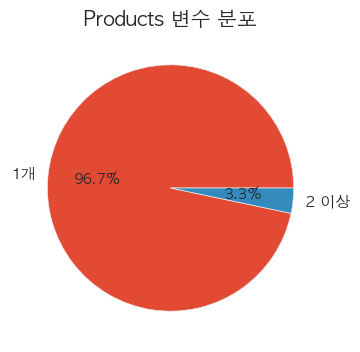

In [12]:
# 'product' 변수가 1 이상인 경우와 그렇지 않은 경우의 개수 계산
count_dict = order['unique_product'].apply(lambda x: '2 이상' if x > 1 else '1개').value_counts()

# 파이 차트 그리기
plt.figure(figsize=(4, 4))
plt.pie(count_dict, labels=count_dict.index, autopct='%1.1f%%')
plt.title('Products 변수 분포')
plt.show()

다른 제품을 함께 사는 사람들은 3.3%밖에 안되고, 오직 1개의 제품만 사는 사람들이 96.7%이다. 

### 도시별 평균 구매액, 구매 제품 수, 구매 프로덕트 수

### 리뷰스코어 데이터 붙이기

### 리뷰스코어와 평균구매가치

In [ ]:
df=pd.read_csv('data/order_final.csv')

In [30]:
#리뷰 스코어와 평균구매가치
df['Review_score'].value_counts().reset_index()

,Review_score,count
0,5.000000,51373
1,4.000000,17213
2,1.000000,8648
3,3.000000,7302
4,2.000000,2691
5,4.500000,52
6,2.500000,30
7,3.500000,23
8,1.500000,8
9,3.333333,1


별점 특, 5점이 엄청 많음. 대부분의 고객들이 만족했음을 알 수 있다.

In [14]:
df.groupby('Review_score')['payment_price'].mean().sort_values(ascending=False).reset_index()

,Review_score,payment_price
0,1.500000,204.703750
1,1.000000,193.339038
2,2.000000,169.254634
3,5.000000,156.197109
4,4.000000,154.044419
5,3.000000,151.294354
6,3.500000,149.629130
7,2.500000,137.437000
8,4.500000,119.409808
9,4.333333,42.770000


1.5, 1,2점을 준 사람들 중에 돈을 많이 지불은 사람들이 많다.
지불한 비용에 비해 제품성이나 기대가 떨어져서 그런걸까?

### 배송시간과 평균구매가치

In [35]:
#배송 시간과 평균구매가치
df['differ'].value_counts().to_frame()

,count
differ,
fast,81061
late,5919
on time,968


예상 배송 시간보다 빨리 온 것들이 대부분. <br>
이커머스 회사는 배송 예상 시간을 정확히 알려줘야한다..!!!!!!!!!! 배송시간 예측 모델을 구현해보는 것도 재미있을 듯. <br>
그리고 예상 배송 시간보다 늦은 배송들도 5천건이나 된다. <br>

In [15]:
df.groupby('differ')['payment_price'].mean().sort_values(ascending=False).reset_index()

,differ,payment_price
0,late,176.593205
1,on time,159.839525
2,fast,158.382348


많이 차이가 나지는 않지만 늦게 배송된 주문일수록 평균구매가치가 높다. 

### 구매개수와 평균구매가치

In [20]:
#items와 평균구매가치
df['items'].value_counts().reset_index()

,items,count
0,1,79092
1,2,6793
2,3,1203
3,4,460
4,5,178
5,6,169
6,7,19
7,8,8
8,10,7
9,12,5


In [34]:
df.groupby('items')['payment_price'].mean().sort_values(ascending=False).reset_index()

,items,payment_price
0,8,2304.921250
1,20,2232.600000
2,10,1763.200000
3,11,1296.936667
4,9,1092.236667
5,15,1004.325000
6,14,771.400000
7,12,743.494000
8,7,646.329474
9,6,524.244201


주문 시 여러가지를 구매할수록 평균구매가치가 높다. 

### 구매한 products 개수와 평균구매가치

In [21]:
#products와 평균구매가치
df['unique_product'].value_counts().reset_index()

,unique_product,count
0,1,85045
1,2,2560
2,3,272
3,4,57
4,6,8
5,5,4
6,7,2


In [19]:
df.groupby('unique_product')['payment_price'].mean().sort_values(ascending=False).reset_index()

,unique_product,payment_price
0,5,1135.617500
1,7,912.755000
2,6,521.426250
3,4,391.807719
4,3,293.607316
5,2,230.548805
6,1,156.807253


여러가지 제품들을 같이 구매할수록 평균구매가치가 높은 편!

In [107]:
#order.to_csv('data/order.csv',index=False)

In [68]:
#고객 위치 정보 데이터 합치기
city=pd.merge(order,customers,on='Customer_id')
city.drop(['Customer_unique_id', 'Customer_zipcode_prefix'],axis=1,inplace=True)

In [69]:
#state 별 구매액 중앙값
state_price=city.groupby('Customer_state')['payment_price'].median().sort_values(ascending=False).reset_index()
state_price


,Customer_state,payment_price
0,AP,157.460
1,PB,152.620
2,RO,151.710
3,TO,148.150
4,AC,147.590
5,PI,145.290
6,AL,141.675
7,RN,141.640
8,PA,136.630
9,MA,135.040


In [21]:
#구매 개수
state_item=city.groupby('Customer_state')['items'].mean().sort_values(ascending=False).reset_index()
state_item

,Customer_state,items
0,AP,1.237288
1,MT,1.165037
2,GO,1.163515
3,MS,1.160377
4,SC,1.151524
5,PR,1.151508
6,RJ,1.146805
7,SP,1.146792
8,PB,1.145610
9,MG,1.141655


In [65]:
#구매 프로덕트
state_product=city.groupby('Customer_state')['unique_product'].mean().sort_values(ascending=False).reset_index()
state_product

,Customer_state,unique_product
0,AP,1.050847
1,RO,1.048035
2,MT,1.046455
3,GO,1.045050
4,MA,1.042813
5,DF,1.041176
6,SP,1.039987
7,BA,1.039487
8,RJ,1.038814
9,RN,1.038724


In [71]:
#city데이터에 리뷰 스코어 평균값 합치기
review_score=reviews.groupby('Order_id')['Review_score'].mean().reset_index()
review_score

city_score=pd.merge(city,review_score,on='Order_id',how='left')
city_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87948 entries, 0 to 87947
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          87948 non-null  int64         
 1   Order_id                       87948 non-null  object        
 2   items                          87948 non-null  int64         
 3   payment_price                  87948 non-null  float64       
 4   unique_product                 87948 non-null  int64         
 5   Customer_id                    87948 non-null  object        
 6   Order_purchase_timestamp       87948 non-null  datetime64[ns]
 7   Order_delivered_customer_date  87948 non-null  datetime64[ns]
 8   Order_estimated_delivery_date  87948 non-null  datetime64[ns]
 9   year                           87948 non-null  int32         
 10  month                          87948 non-null  int32         
 11  hour           

In [76]:
city_score.to_csv('data/order_final.csv',index=False)

## 배송시간을 줄이자!
- 현재 주문~배송 평균 시간
- 현재 주문~물류처리 평균 시간
- 지역별 배송시간
- 셀러별 배송시간 평균

- 예상 배송 시간과 실제 배송 시간 차이 (정시, 늦음, 빠름)

- 배송시간 년도별 추이
- 배송시간별 고객만족도 추이
- 카테고리별 배송 시간